# Dynamic Pricing for Airbnb – Cape Town
This project models optimal nightly rates for Airbnb listings using historical data, demand/supply signals, and predictive modeling.

## Import Libraries

In [ ]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Display settings
sns.set(style="whitegrid")
%matplotlib inline
pd.set_option("display.max_columns", 100)

## Data Loading

In [ ]:
# Load datasets
listings = pd.read_csv("listings.csv.gz")
calendar = pd.read_csv("calendar.csv.gz")

Shape

In [ ]:
# Shape
print("Listings shape:", listings.shape)
print("Calendar shape:", calendar.shape)

Listings shape: (25882, 79)
Calendar shape: (9436819, 7)


Head

In [ ]:
print("Listings head:")
listings.head(2)

Listings head:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,https://www.airbnb.com/rooms/3191,20250319225355,2025-03-20,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,https://www.airbnb.com/users/show/3754,Brigitte,2008-10-21,"Cape Town, South Africa",I'm single and love to travel and meeting peop...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/3754/profile_...,https://a0.muscache.com/im/users/3754/profile_...,NaN,1.0,2.0,"['email', 'phone', 'work_email']",t,t,"Southern Suburbs, Western Cape, South Africa",Ward 57,NaN,-33.947620,18.475990,Entire home,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Refrigerator"", ""Oven"", ""Hot water"", ""Wifi"", ...",$674.00,3,730,1.0,3.0,730.0,730.0,3.0,730.0,NaN,t,14,14,14,56,2025-03-20,84,8,0,14,7,48,32352.0,2013-05-31,2025-01-08,4.81,4.82,4.69,4.96,4.95,4.77,4.8,NaN,t,1,1,0,0,0.58
1,15077,https://www.airbnb.com/rooms/15077,20250319225355,2025-03-20,city scrape,Relaxed beach living in style,Our Superior Rooms (approx. 25 m²) are located...,It is probably the best hub in order to explor...,https://a0.muscache.com/pictures/4a8fceaa-655e...,59342,https://www.airbnb.com/users/show/59342,Georg,2009-12-02,Gibraltar,challenge us please! we love to perform!,within a few hours,100%,83%,t,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscache.com/im/pictures/user/User/...,NaN,7.0,7.0,"['email', 'phone']",t,t,"Tableview - Sunset Beach, Cape Town, South Africa",Ward 4,NaN,-33.858356,18.490376,Private room in rental unit,Private room,2,1.0,1 private bath,1.0,2.0,"[""Refrigerator"", ""Oven"", ""Hot water"", ""Books a...","$1,818.00",2,1125,2.0,6.0,1125.0,1125.0,3.7,1125.0,NaN,t,29,45,64,236,2025-03-20,7,0,0,217,0,0,0.0,2013-01-06,2022-06-16,5.00,4.86,4.86,4.86,4.71,4.86,5.0,NaN,f,6,1,5,0,0.05


In [ ]:
print("Calendar head:")
calendar.head(2)

Calendar head:


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3191,2025-03-20,f,$47.00,NaN,3.0,730.0
1,3191,2025-03-21,f,$47.00,NaN,3.0,730.0


Info

In [ ]:
print("Listings head:")
listings.info()

Listings head:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25882 entries, 0 to 25881
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25882 non-null  int64  
 1   listing_url                                   25882 non-null  object 
 2   scrape_id                                     25882 non-null  int64  
 3   last_scraped                                  25882 non-null  object 
 4   source                                        25882 non-null  object 
 5   name                                          25881 non-null  object 
 6   description                                   25585 non-null  object 
 7   neighborhood_overview                         13119 non-null  object 
 8   picture_url                                   25882 non-null  object 
 9   host_id                                       

In [ ]:
print("Calendar head:")
calendar.info()

Calendar head:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9436819 entries, 0 to 9436818
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 504.0+ MB


Describe

In [ ]:
print("Listings describe:")
listings.describe()

Listings describe:


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.588200e+04,2.588200e+04,2.588200e+04,25880.000000,25880.000000,0.0,25882.000000,25882.000000,25882.000000,21135.000000,25201.00000,21226.000000,25882.000000,2.588200e+04,25856.000000,25856.000000,2.585600e+04,2.585600e+04,25856.000000,2.585600e+04,0.0,25882.000000,25882.000000,25882.000000,25882.000000,25882.000000,25882.000000,25882.000000,25882.000000,25882.000000,25882.000000,2.101600e+04,20663.000000,20662.000000,20662.000000,20658.000000,20661.000000,20659.000000,20658.000000,25882.000000,25882.000000,25882.000000,25882.000000,20663.000000
mean,6.193987e+17,2.025032e+13,2.107309e+08,15.279173,21.801546,NaN,-33.955507,18.472194,3.772120,1.698368,1.90179,2.234712,4.533460,8.500156e+02,3.906018,5.480701,9.757801e+02,9.939492e+02,4.532983,9.864164e+02,NaN,11.973881,30.012171,50.390889,206.381848,24.270536,6.339696,0.639711,169.242331,5.992968,40.346573,1.041758e+05,4.750517,4.776336,4.764017,4.819457,4.824705,4.802616,4.705811,12.667491,10.711421,1.903601,0.021443,0.967318
std,5.473306e+17,7.441550e+00,2.068323e+08,43.025153,86.310864,NaN,0.098455,0.124231,2.416681,1.225152,1.44310,1.795435,21.266733,6.215715e+04,15.800817,20.899591,6.218778e+04,6.218765e+04,17.394636,6.218768e+04,NaN,10.705207,21.685593,33.069899,131.598573,47.117951,10.656020,1.231380,105.684560,10.621782,59.197990,2.159578e+05,0.445046,0.430204,0.425497,0.407910,0.414525,0.376570,0.458049,28.404449,25.886254,12.486788,0.243861,1.074962
min,3.191000e+03,2.025032e+13,3.754000e+03,0.000000,0.000000,NaN,-34.262840,18.320200,1.000000,0.000000,0.00000,0.000000,1.000000,1.000000e+00,-1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.364584e+07,2.025032e+13,3.618844e+07,1.000000,1.000000,NaN,-34.014970,18.400300,2.000000,1.000000,1.00000,1.000000,1.000000,6.000000e+01,1.000000,2.000000,1.200000e+02,1.800000e+02,2.000000,1.800000e+02,NaN,0.000000,5.000000,15.000000,82.000000,1.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.000000e+00,4.690000,4.750000,4.710000,4.810000,4.830000,4.760000,4.640000,1.000000,1.000000,0.000000,0.000000,0.230000
50%,7.592885e+17,2.025032e+13,1.197750e+08,3.000000,3.000000,NaN,-33.927451,18.425365,3.000000,1.000000,1.00000,2.000000,2.000000,3.650000e+02,2.000000,3.000000,3.650000e+02,3.650000e+02,2.000000,3.650000e+02,NaN,11.000000,33.000000,60.000000,243.000000,6.000000,2.000000,0.000000,209.000000,1.000000,14.000000,3.456600e+04,4.880000,4.900000,4.890000,4.950000,4.970000,4.910000,4.830000,2.000000,1.000000,0.000000,0.000000,0.630000
75%,1.143203e+18,2.025032e+13,3.811219e+08,10.000000,12.000000,NaN,-33.910028,18.482308,4.000000,2.000000,2.00000,3.000000,3.000000,1.125000e+03,3.000000,5.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,NaN,21.000000,49.000000,79.000000,331.000000,25.000000,8.000000,1.000000,264.000000,7.000000,54.000000,1.154790e+05,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000

In [ ]:
print("Calendar describe:")
calendar.describe()

Calendar describe:


,listing_id,minimum_nights,maximum_nights
count,9.436819e+06,9.436346e+06,9.436346e+06
mean,6.196653e+17,4.529360e+00,9.864879e+02
std,5.473106e+17,1.843043e+01,6.219011e+04
min,3.191000e+03,-1.000000e+00,1.000000e+00
25%,3.362629e+07,2.000000e+00,1.800000e+02
50%,7.594287e+17,2.000000e+00,3.650000e+02
75%,1.143370e+18,4.000000e+00,1.125000e+03
max,1.379872e+18,9.990000e+02,1.000000e+07


## Data health checks (missing values)

In [ ]:
# Listings
listings.isnull().mean().sort_values(ascending=False).head(20)

,0
neighbourhood_group_cleansed,1.000000
calendar_updated,1.000000
license,0.996600
host_neighbourhood,0.995170
host_about,0.502473
neighborhood_overview,0.493123
neighbourhood,0.493123
host_location,0.255506
review_scores_checkin,0.201839
review_scores_value,0.201839


In [ ]:
# Calendar
calendar.isnull().mean().sort_values(ascending=False).head(20)

,0
adjusted_price,0.997718
minimum_nights,0.000050
maximum_nights,0.000050
available,0.000000
date,0.000000
listing_id,0.000000
price,0.000000


## Data Cleaning

In [ ]:
# Convert price from USD to ZAR (replace 17.67 with the current USD to ZAR exchange rate)
usd_to_zar_exchange_rate = 17.67 # Exhange rate as of 28 August 2025

Listings df

In [ ]:
# Clean the 'price' column
if 'price' in listings.columns and listings['price'].dtype == 'object':
    # Remove '$' and ',' and convert to numeric, coercing errors to NaN
    listings['price_cleaned'] = pd.to_numeric(listings['price'].str.replace('[\$,]', '', regex=True), errors='coerce')
    # Drop rows where the cleaned price is null or zero, as they are not useful for pricing analysis
    listings.dropna(subset=['price_cleaned'], inplace=True)
    listings = listings[listings['price_cleaned'] > 0]

listings['price_zar'] = listings['price_cleaned'] * usd_to_zar_exchange_rate

# Display the data types and the first few rows to confirm changes
print("Data types after cleaning 'price':")
print(listings[['price', 'price_cleaned', 'price_zar']].info())
print("\nFirst 5 rows with cleaned price in USD and ZAR:")
print(listings[['price', 'price_cleaned', 'price_zar']].head())

Data types after cleaning 'price':
<class 'pandas.core.frame.DataFrame'>
Index: 21016 entries, 0 to 25881
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21016 non-null  object 
 1   price_cleaned  21016 non-null  float64
 2   price_zar      21016 non-null  float64
dtypes: float64(2), object(1)
memory usage: 656.8+ KB
None

First 5 rows with cleaned price in USD and ZAR:
       price  price_cleaned  price_zar
0    $674.00          674.0   11909.58
1  $1,818.00         1818.0   32124.06
2    $621.00          621.0   10973.07
4  $1,400.00         1400.0   24738.00
6  $7,000.00         7000.0  123690.00


In [ ]:
# Convert 'date' column to datetime objects
calendar['date'] = pd.to_datetime(calendar['date'])

# Clean the 'price' column (similar to the listings dataframe)
# We will focus on the 'price' column as 'adjusted_price' might be the same in many cases
if calendar['price'].dtype == 'object':
    calendar['price_cleaned'] = pd.to_numeric(calendar['price'].str.replace('[\$,]', '', regex=True), errors='coerce')

# We are only interested in dates where the listing is available for booking
available_df = calendar[calendar['available'] == 't'].copy()
available_df.dropna(subset=['price_cleaned'], inplace=True)

available_df['price_zar'] = available_df['price_cleaned'] * usd_to_zar_exchange_rate

# Display the data types and the first few rows to confirm changes
print("Data types after cleaning:")
print(available_df.info())
print("\nFirst 5 rows of available listings data:")
print(available_df.head())

Data types after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 5390583 entries, 3 to 9436818
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
 7   price_cleaned   float64       
 8   price_zar       float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 411.3+ MB
None

First 5 rows of available listings data:
    listing_id       date available   price adjusted_price  minimum_nights  \
3         3191 2025-03-23         t  $47.00            NaN             3.0   
8         3191 2025-03-28         t  $47.00            NaN             1.0   
9         3191 2025-03-29         t  $47.00            NaN             3.0   
10        3191 2025-03-30   

## Exploratory Data Analysis (EDA) focused on Pricing Dynamics

### Understanding Listing Characteristics and Their Price Influence

Concentrating on the `listings` dataframe to understand the inherent characteristics of the properties and their correlation with price

#### Property and Room Type

Let's analyze how the type of property and room affects the price. This will help us understand the basic pricing structure of the listings.

1. Price Distribution by Room Type

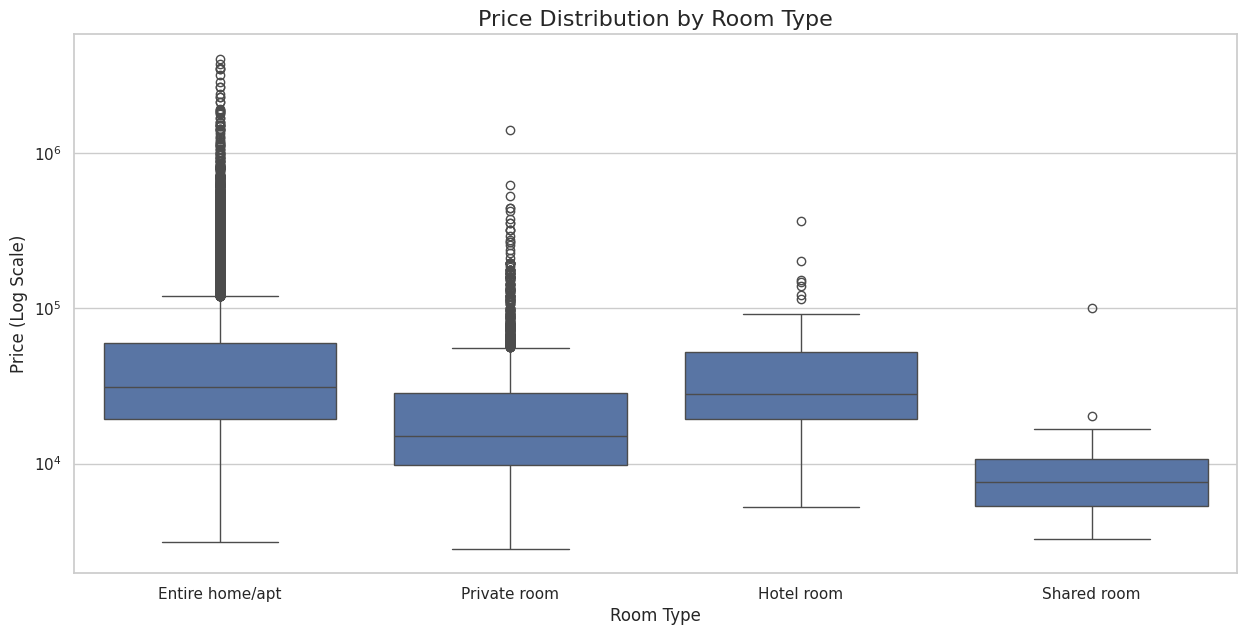

In [ ]:
# Set figure size for better readability
plt.figure(figsize=(15, 7))

# Plotting Room Type vs. Price
# Boxplot is excellent for showing distribution, median, and outliers
sns.boxplot(data=listings, x='room_type', y='price_zar', order=listings['room_type'].value_counts().index)
plt.title('Price Distribution by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price (Log Scale)', fontsize=12)
plt.yscale('log') # Use a log scale due to price outliers which can skew the plot
plt.show()

**Insight:** "Entire home/apt" commands the highest median price, significantly more than any other category. This is followed by "Hotel room," "Private room," and finally "Shared room," which has the lowest median price.

2. Price Distribution for Top 10 Property Types

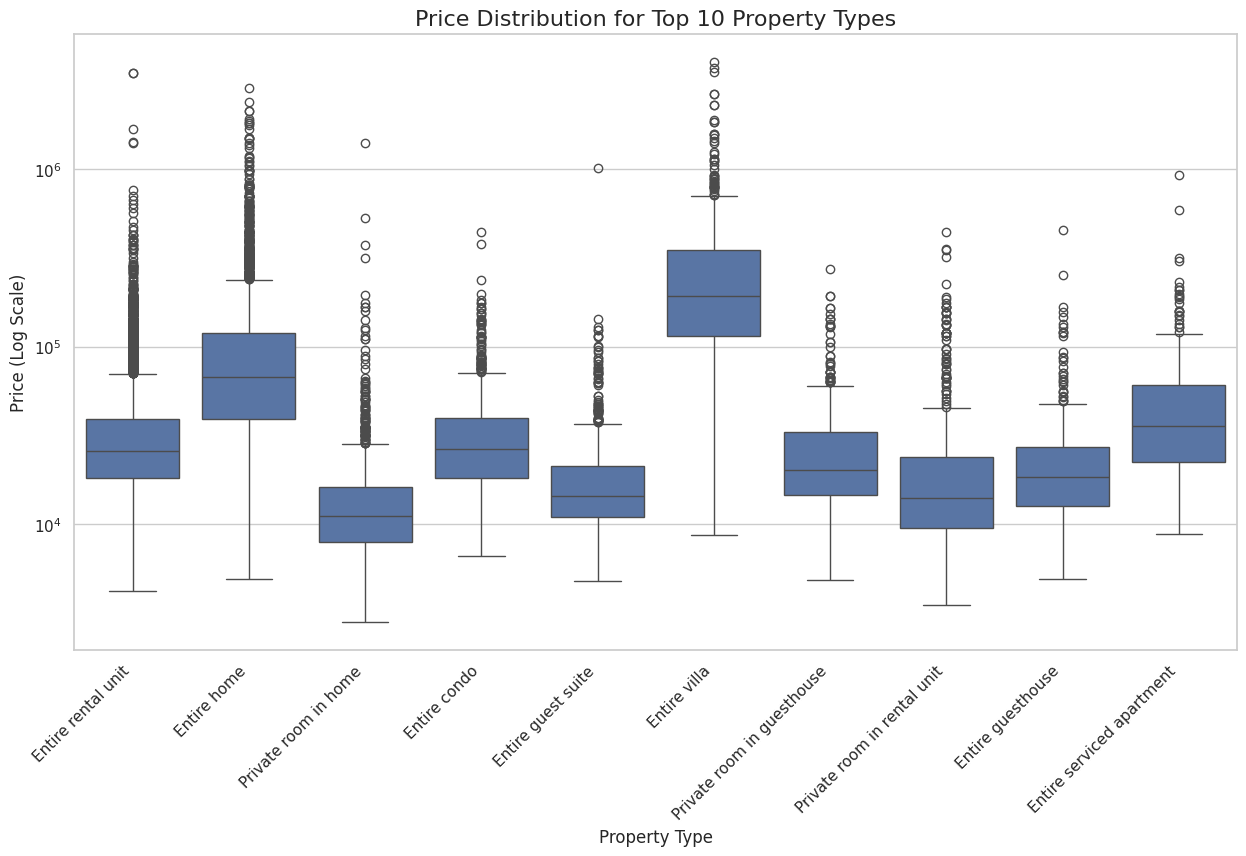

In [ ]:
# --- Analysis of Property Type vs. Price ---

# To make the plot readable, we'll only look at the top 10 most common property types
top_10_property_types = listings['property_type'].value_counts().nlargest(10).index

# Filter the dataframe to include only these top property types
df_top_10_properties = listings[listings['property_type'].isin(top_10_property_types)]

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_top_10_properties, x='property_type', y='price_zar', order=top_10_property_types)
plt.title('Price Distribution for Top 10 Property Types', fontsize=16)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Price (Log Scale)', fontsize=12)
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.show()

**Insight:** "Entire villa" stands out as having the highest median price and the widest price range, indicating it's a premium category. In contrast, "Private room in home" and "Private room in rental unit" have the lowest median prices. This shows that even within the "Entire home" or "Private room" categories, the specific type of property (e.g., villa, guesthouse, condo) has a strong influence on price.

#### Accomodation Capacity

Here, we'll investigate the relationship between price and the listing's capacity, such as the number of people it accommodates, bedrooms, and beds.

3. Correlation Matrix of Accommodation Features and Price

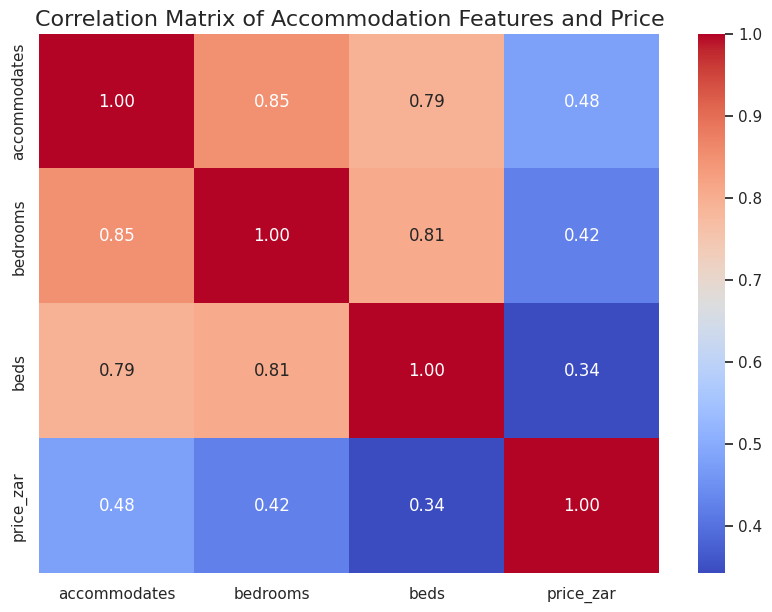

In [ ]:
# Select the relevant numeric columns
capacity_features = ['accommodates', 'bedrooms', 'beds', 'price_zar']
capacity_df = listings[capacity_features].dropna()

# Calculate the correlation matrix
correlation_matrix = capacity_df.corr()

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Accommodation Features and Price', fontsize=16)
plt.show()

**Insight:** All three capacity features (accommodates, bedrooms, beds) have a positive correlation with price. The strong correlation between accommodates and bedrooms (0.85) is expected. Accommodates (0.48) and bedrooms (0.42) have the strongest correlation with price, while beds (0.34) is slightly weaker but still significant.

4. Accommodation Capacity vs. Price

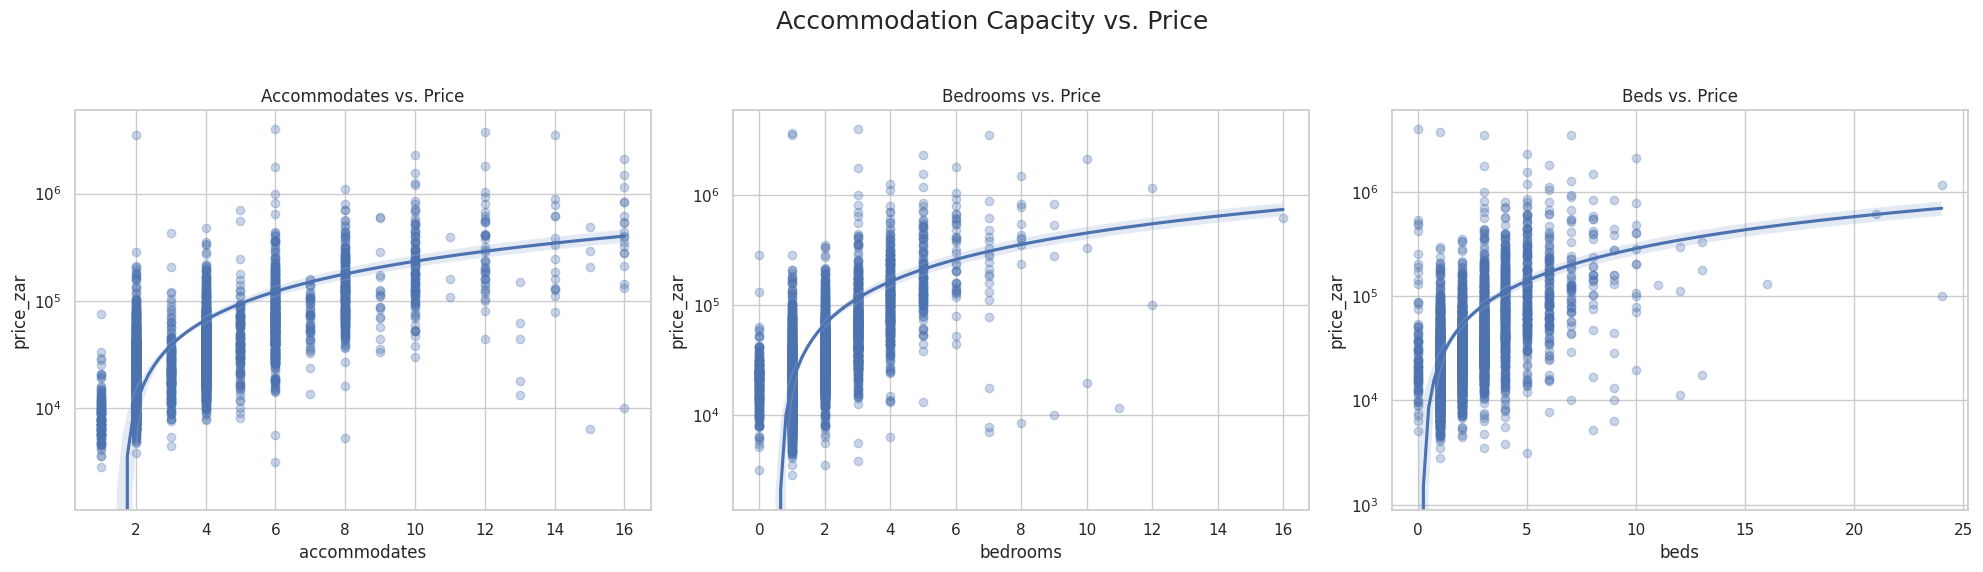

In [ ]:
# Using a sample to avoid overplotting and make rendering faster
sample_df = listings.sample(n=5000, random_state=42)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Accommodation Capacity vs. Price', fontsize=18)

# Accommodates vs. Price
sns.regplot(ax=axes[0], data=sample_df, x='accommodates', y='price_zar', scatter_kws={'alpha':0.3})
axes[0].set_title('Accommodates vs. Price')
axes[0].set_yscale('log')

# Bedrooms vs. Price
sns.regplot(ax=axes[1], data=sample_df, x='bedrooms', y='price_zar', scatter_kws={'alpha':0.3})
axes[1].set_title('Bedrooms vs. Price')
axes[1].set_yscale('log')

# Beds vs. Price
sns.regplot(ax=axes[2], data=sample_df, x='beds', y='price_zar', scatter_kws={'alpha':0.3})
axes[2].set_title('Beds vs. Price')
axes[2].set_yscale('log')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Insight:** The plots confirm a clear positive, non-linear trend: price increases as the number of accommodates, bedrooms, and beds increases. The use of a log scale on the price axis helps to manage the wide range of prices. Importantly, the plots also show that for any given capacity (e.g., 2 bedrooms), there is a very wide distribution of prices, reinforcing that other factors heavily influence the final price.

#### Geospatial Analysis

This analysis helps visualize where the listings are located and how price varies by neighborhood, allowing you to identify premium areas.

5. Geographic Distribution of Listings by Neighbourhood

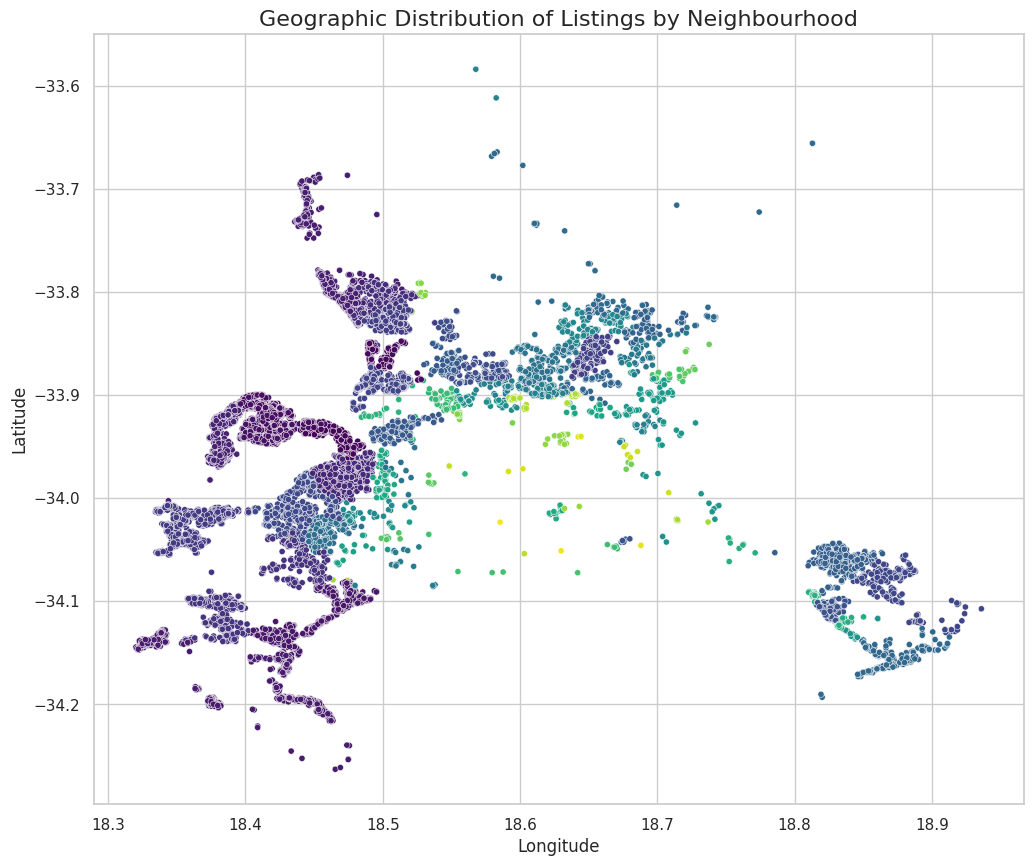

In [ ]:
# Create a scatter plot using longitude and latitude
# We will color-code the dots by neighborhood to see their distribution

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=listings,
    x='longitude',
    y='latitude',
    hue='neighbourhood_cleansed',
    palette='viridis', # A color-friendly palette
    s=20, # size of the points
    legend=False # Hide the legend as there are too many neighborhoods
)

plt.title('Geographic Distribution of Listings by Neighbourhood', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

**Insight:** Listings are not uniformly distributed but are concentrated in specific clusters. There appears to be a dense, large cluster on the western side (around longitude 18.4) and another smaller, distinct cluster on the eastern side (around longitude 18.8). This immediately tells you where the main Airbnb markets are located.

6. Geographic Price Hotspots of Listings

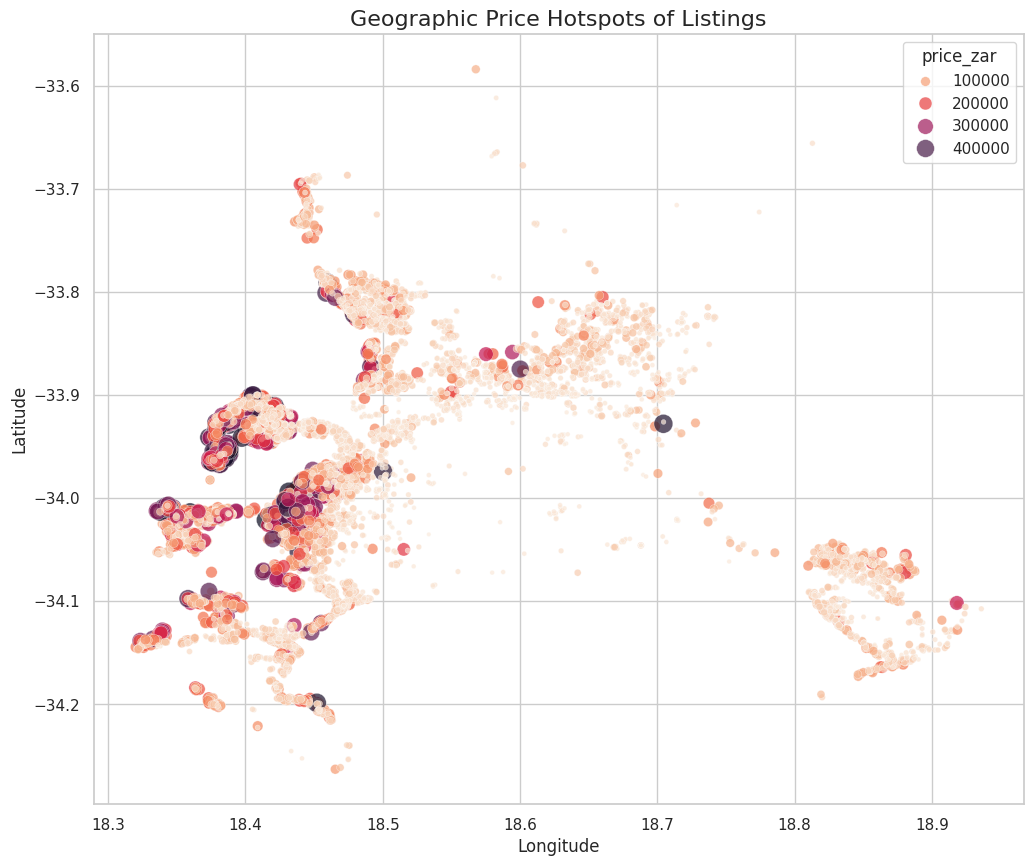

In [ ]:
price_cap = listings['price_zar'].quantile(0.99)
df_price_capped = listings[listings['price_zar'] < price_cap]

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_price_capped,
    x='longitude',
    y='latitude',
    hue='price_zar',
    palette='rocket_r', # A palette where darker means more expensive
    size='price_zar', # Also vary point size by price
    sizes=(10, 200),
    alpha=0.7,
    legend='auto'
)

plt.title('Geographic Price Hotspots of Listings', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

**Insight:** The most expensive listings (larger, darker dots) are heavily concentrated in specific parts of the western cluster, particularly along the coastline. While there are listings scattered elsewhere, the high-value "hotspots" are geographically well-defined.

#### Price Distribution for Superhosts vs. Regular Hosts

 Finaly for Property and Room Type, let's examine if host-level metrics, like being a "Superhost," correlate with higher prices. This can help determine if host reputation has a pricing power.

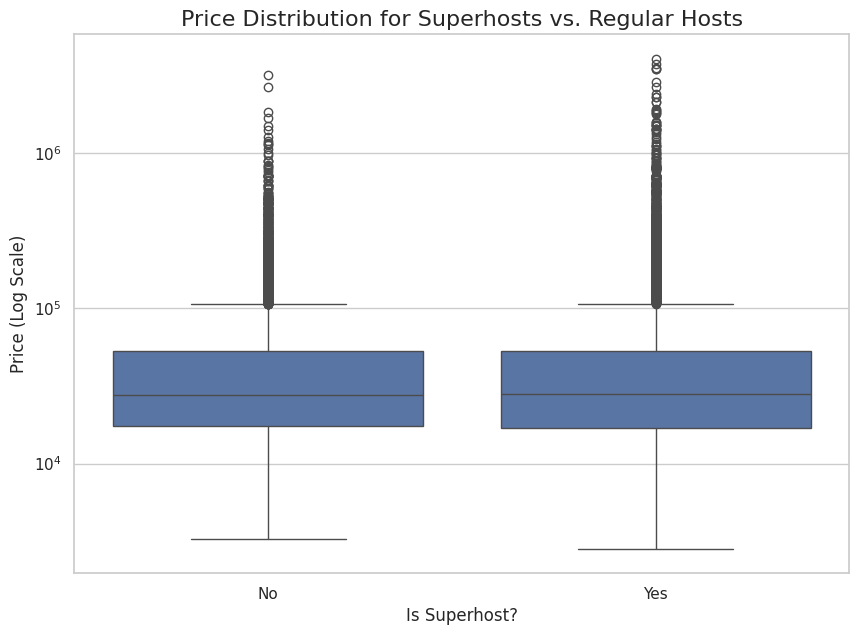

In [ ]:
# --- 5. Analysis of Host-Specific Factors ---

# Superhost Status vs. Price
plt.figure(figsize=(10, 7))
sns.boxplot(data=listings, x='host_is_superhost', y='price_zar')
plt.title('Price Distribution for Superhosts vs. Regular Hosts', fontsize=16)
plt.xlabel('Is Superhost?', fontsize=12)
plt.ylabel('Price (Log Scale)', fontsize=12)
plt.yscale('log')
# Create more readable labels for the x-axis
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

**Insight:** The difference is not dramatic

### Analyzing Temporal Pricing Patterns with Calendar Data

In this part of the analysis, we'll use `calender.csv` dataset to uncover how price fluctuate over time due to seasonality, day of the week, and booking availability

#### 1. Seasonality and Yearly Trends

Let's investigate how the average price of an Airbnb listing changes throughout the year.

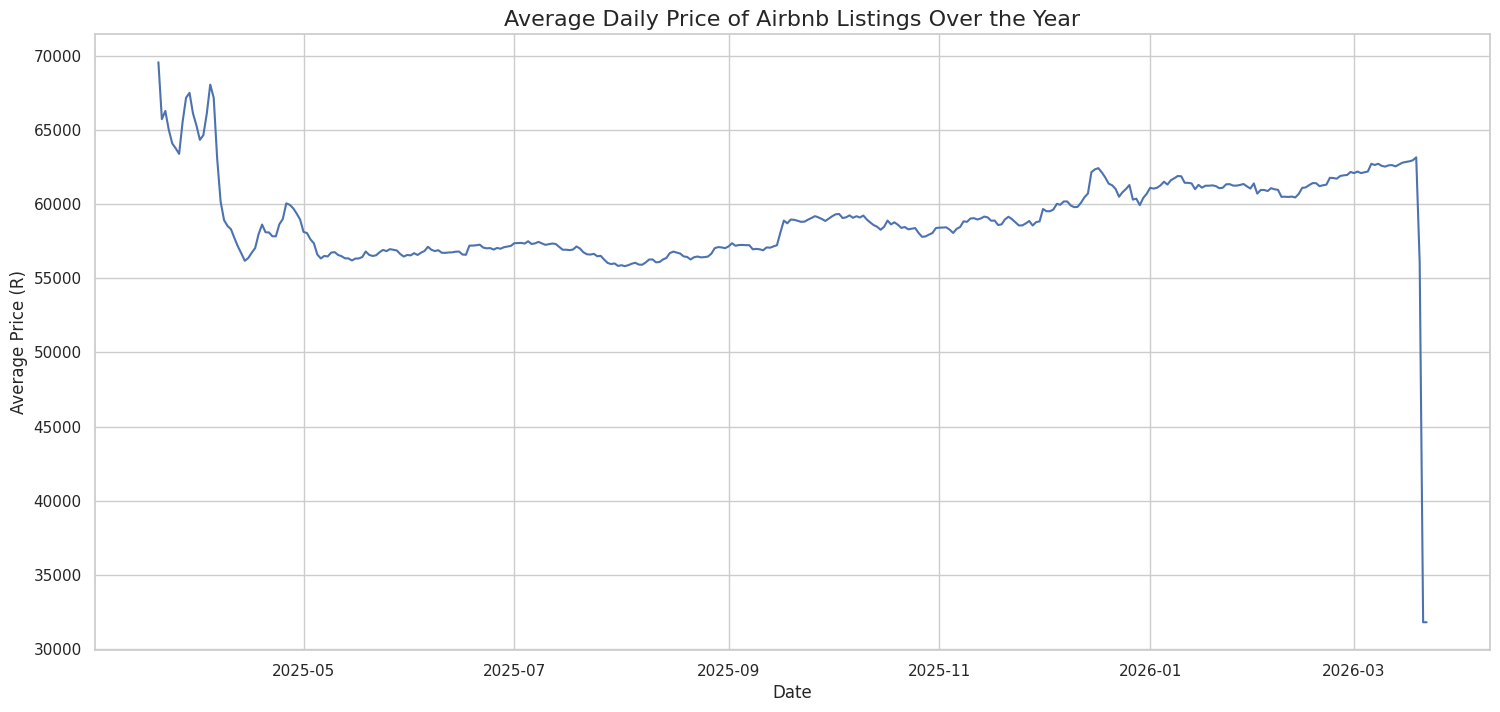

In [ ]:
# Calculate the average price for each date across all listings
avg_price_by_date = available_df.groupby('date')['price_zar'].mean().reset_index()

# Plot the average price over time
plt.figure(figsize=(18, 8))
plt.plot(avg_price_by_date['date'], avg_price_by_date['price_zar'])
plt.title('Average Daily Price of Airbnb Listings Over the Year', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price (R)', fontsize=12)
plt.grid(True)
plt.show()

**Insight:** The graph reveals significant price volatility, especially at the beginning of the period (April-May 2025), where prices are both high and fluctuate rapidly. Following this, the price settles into a more stable but lower pattern before gradually trending upwards towards the end of the year. There is an anomalous, sharp drop at the very end of the data (March 2026), which is likely a data artifact or an issue with the data collection for the final day.

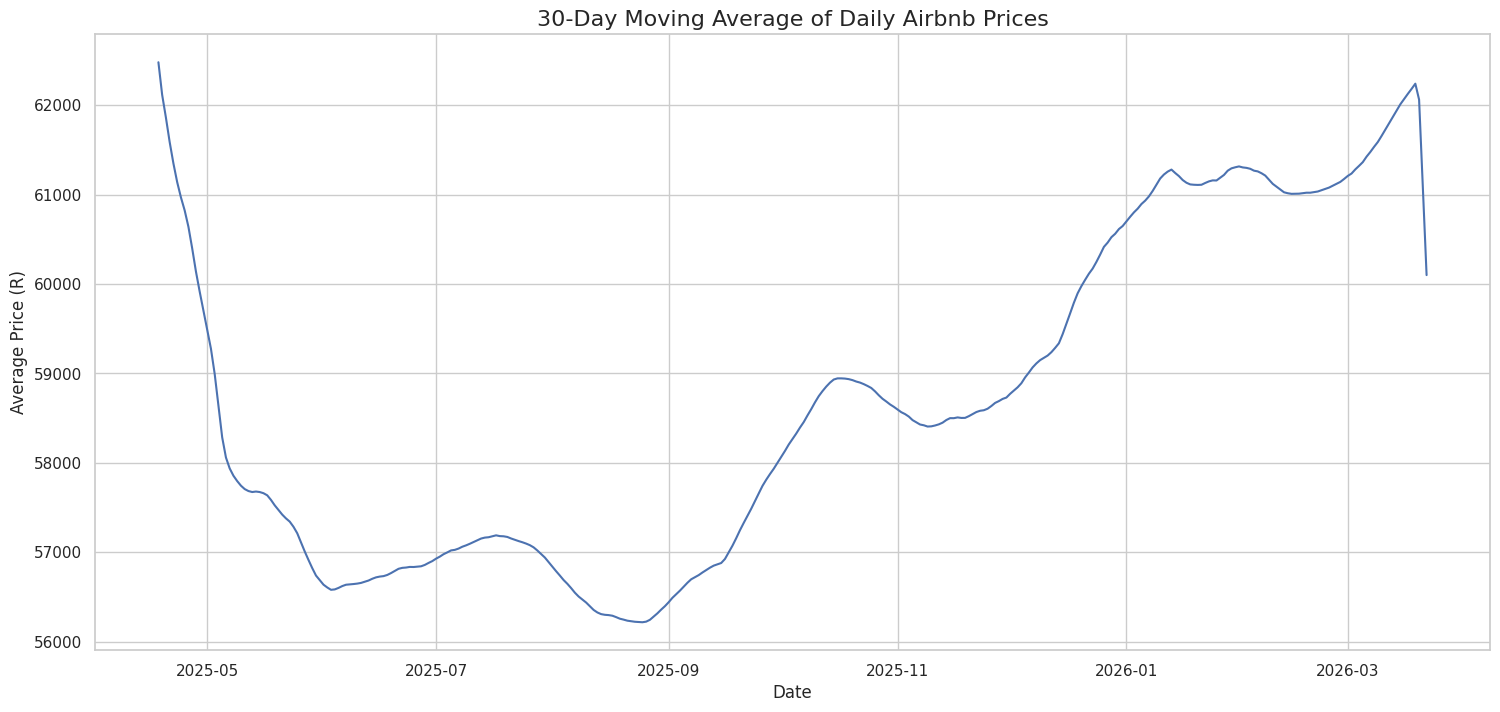

In [ ]:
# To get a smoother trend, we can use a rolling average (e.g., 30-day moving average)
avg_price_by_date['30_day_avg'] = avg_price_by_date['price_zar'].rolling(window=30).mean()

plt.figure(figsize=(18, 8))
plt.plot(avg_price_by_date['date'], avg_price_by_date['30_day_avg'])
plt.title('30-Day Moving Average of Daily Airbnb Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price (R)', fontsize=12)
plt.grid(True)
plt.show()

**Insight:** This view clearly defines the market's seasonality. There is a distinct low season from approximately June to September 2025, where prices hit their lowest point. From September onwards, prices begin a steady climb, accelerating significantly from November through January 2026, which represents the peak season. This peak likely corresponds to summer holidays and New Year's celebrations in the Southern Hemisphere.

#### 2. Availability and Occupancy Rate Analysis

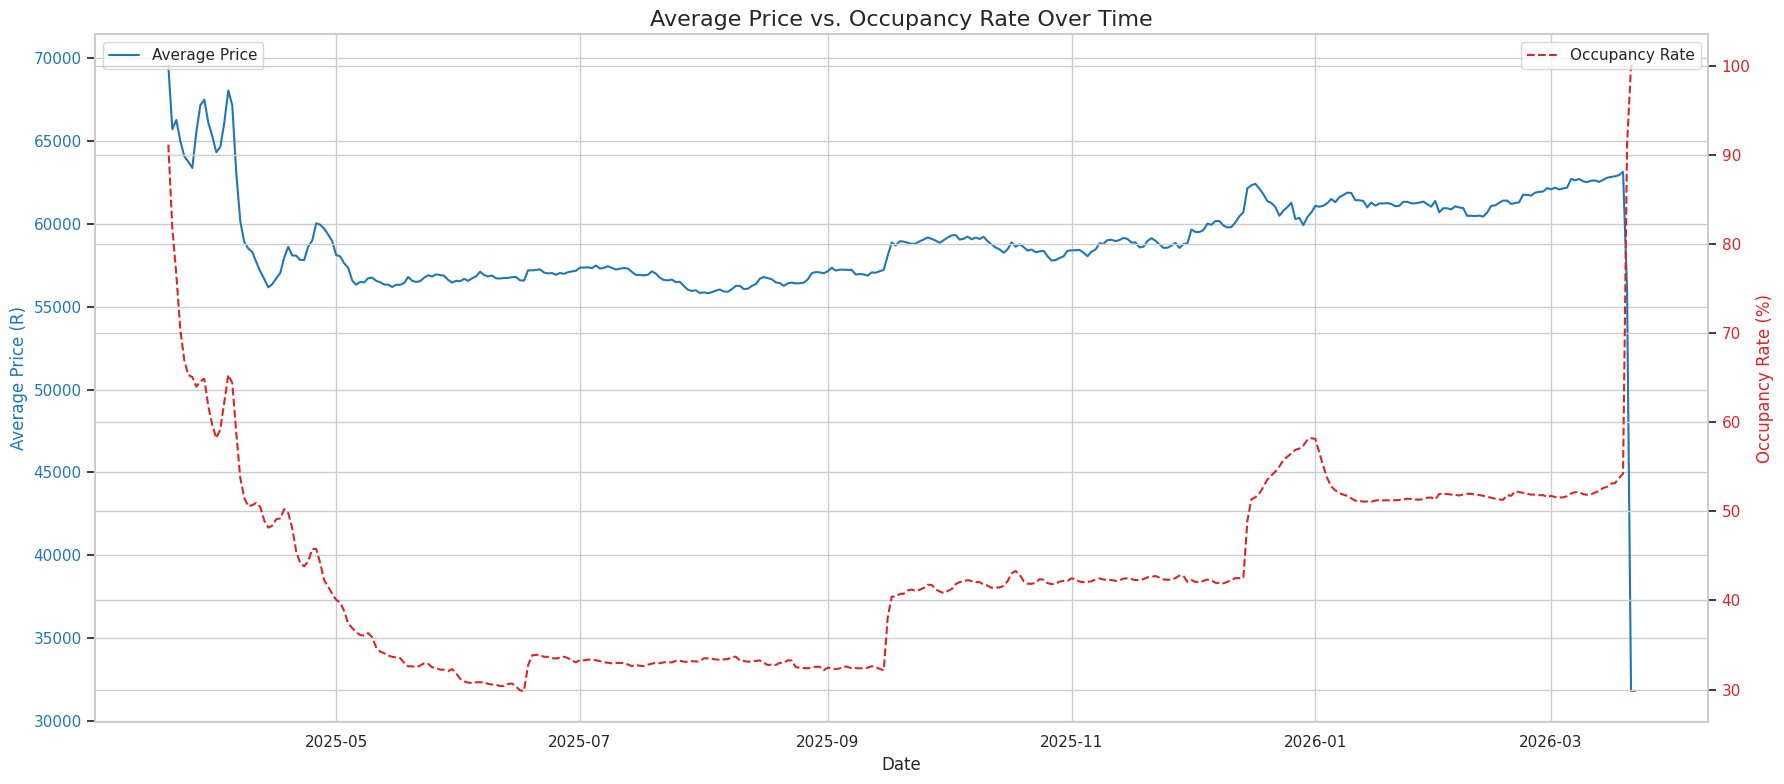

In [ ]:
# Calculate the total number of listings available each day
availability_by_date = calendar.groupby('date')['available'].apply(lambda x: (x == 't').sum()).reset_index(name='available_listings')

# Calculate the total number of unique listings in the dataset
total_listings_count = calendar['listing_id'].nunique()

# Calculate the occupancy rate for each day
availability_by_date['occupancy_rate'] = 1 - (availability_by_date['available_listings'] / total_listings_count)

# Merge occupancy data with the average price data
price_and_occupancy = pd.merge(avg_price_by_date, availability_by_date, on='date')

# --- Visualize the relationship ---

fig, ax1 = plt.subplots(figsize=(18, 8))

# Plot Average Price on the primary y-axis (left)
color = 'tab:blue'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Average Price (R)', color=color, fontsize=12)
ax1.plot(price_and_occupancy['date'], price_and_occupancy['price_zar'], color=color, label='Average Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis (right) for Occupancy Rate
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Occupancy Rate (%)', color=color, fontsize=12)
ax2.plot(price_and_occupancy['date'], price_and_occupancy['occupancy_rate'] * 100, color=color, linestyle='--', label='Occupancy Rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Average Price vs. Occupancy Rate Over Time', fontsize=16)
fig.tight_layout()
plt.show()

**Insight:** There is a clear inverse relationship between price and occupancy during the first half of the year. From April to July 2025, as occupancy falls (more listings are available), the average price also trends downwards. Crucially, from September 2025 onwards, as occupancy starts to rise, so does the average price. This demonstrates a classic supply and demand response. The sharp spike in occupancy right before December suggests a high-demand holiday period is beginning.

### Merging Listings and Calendar Data for Deeper Insights

In [ ]:
# --- Merging the DataFrames ---

# Selecting only the columns we need from the listings data to keep the merged dataframe lean.
columns_to_merge = [
    'id', 'property_type', 'room_type', 'neighbourhood_cleansed',
    'accommodates', 'bedrooms', 'minimum_nights', 'review_scores_rating'
]

listings_subset = listings[columns_to_merge]

# Perform the merge
# We merge on 'listing_id' from the calendar data and 'id' from the listings data.
merged_df = pd.merge(
    available_df,
    listings_subset,
    left_on='listing_id',
    right_on='id',
    how='left'
)

# Drop the redundant 'id' column from the listings data
merged_df.drop('id', axis=1, inplace=True)

print("Merge successful. Here's the head of the merged dataframe:")
print(merged_df.head())
print("\nInfo of the merged dataframe:")
merged_df.info()

Merge successful. Here's the head of the merged dataframe:
   listing_id       date available   price adjusted_price  minimum_nights_x  \
0        3191 2025-03-23         t  $47.00            NaN               3.0   
1        3191 2025-03-28         t  $47.00            NaN               1.0   
2        3191 2025-03-29         t  $47.00            NaN               3.0   
3        3191 2025-03-30         t  $47.00            NaN               3.0   
4        3191 2025-03-31         t  $47.00            NaN               3.0   

   maximum_nights  price_cleaned  price_zar  day_of_week  day_name  \
0           730.0           47.0     830.49            6    Sunday   
1           730.0           47.0     830.49            4    Friday   
2           730.0           47.0     830.49            5  Saturday   
3           730.0           47.0     830.49            6    Sunday   
4           730.0           47.0     830.49            0    Monday   

  property_type        room_type neighbourhoo

#### 1. Comparing Pricing Strategies by Property Type Over Time

Does a "Private room" have the same seasonal price fluctuations as an "Entire apartment"? This analysis will show how different segments of the market adjust their prices throughout the year.

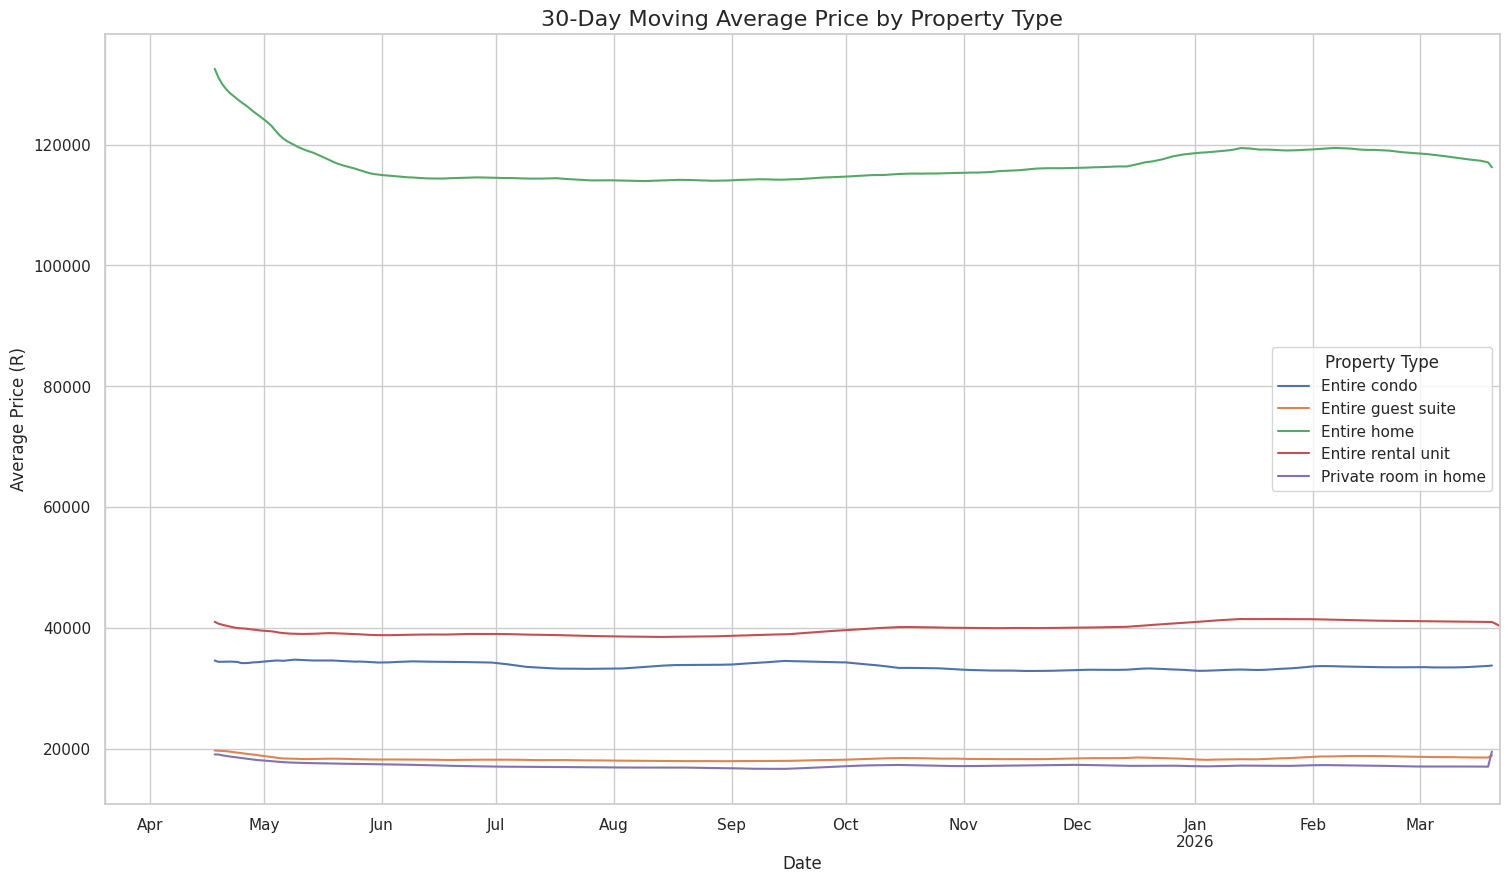

In [ ]:
# --- Temporal Pricing Analysis by Property Type ---

# The top 5 most common property types in the merged dataset.
top_5_property_types = merged_df['property_type'].value_counts().nlargest(5).index

# Filter the merged dataframe to only include these top property types.
df_top_5 = merged_df[merged_df['property_type'].isin(top_5_property_types)]

# Group by date and property type, then calculate the mean price.
# The unstack() method pivots the 'property_type' to become columns.
avg_price_by_type_and_date = df_top_5.groupby(['date', 'property_type'])['price_zar'].mean().unstack()

# To make trends smoother and more interpretable, apply a 30-day rolling average.
smoothed_prices = avg_price_by_type_and_date.rolling(window=30).mean()

# Plotting the results
smoothed_prices.plot(figsize=(18, 10))
plt.title('30-Day Moving Average Price by Property Type', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price (R)', fontsize=12)
plt.legend(title='Property Type')
plt.grid(True)
plt.show()

**Insight:** The chart reveals a rigid and consistent pricing hierarchy. "Entire home" is in a premium tier of its own, priced substantially higher than all other types. Below it, "Entire rental unit" and "Entire condo" form a mid-tier price bracket, followed by "Private room in home" and "Entire guest suite" in the lowest-priced tier. Crucially, all property types follow the exact same market-wide seasonal trend: a price dip in the middle of the year and a rise towards the peak season at the end of the year.

#### 2. Analyzing Price Fluctuations in Top Neighborhoods

Let's examine if high-demand neighborhoods have more volatile pricing and if their peak seasons differ from other areas.

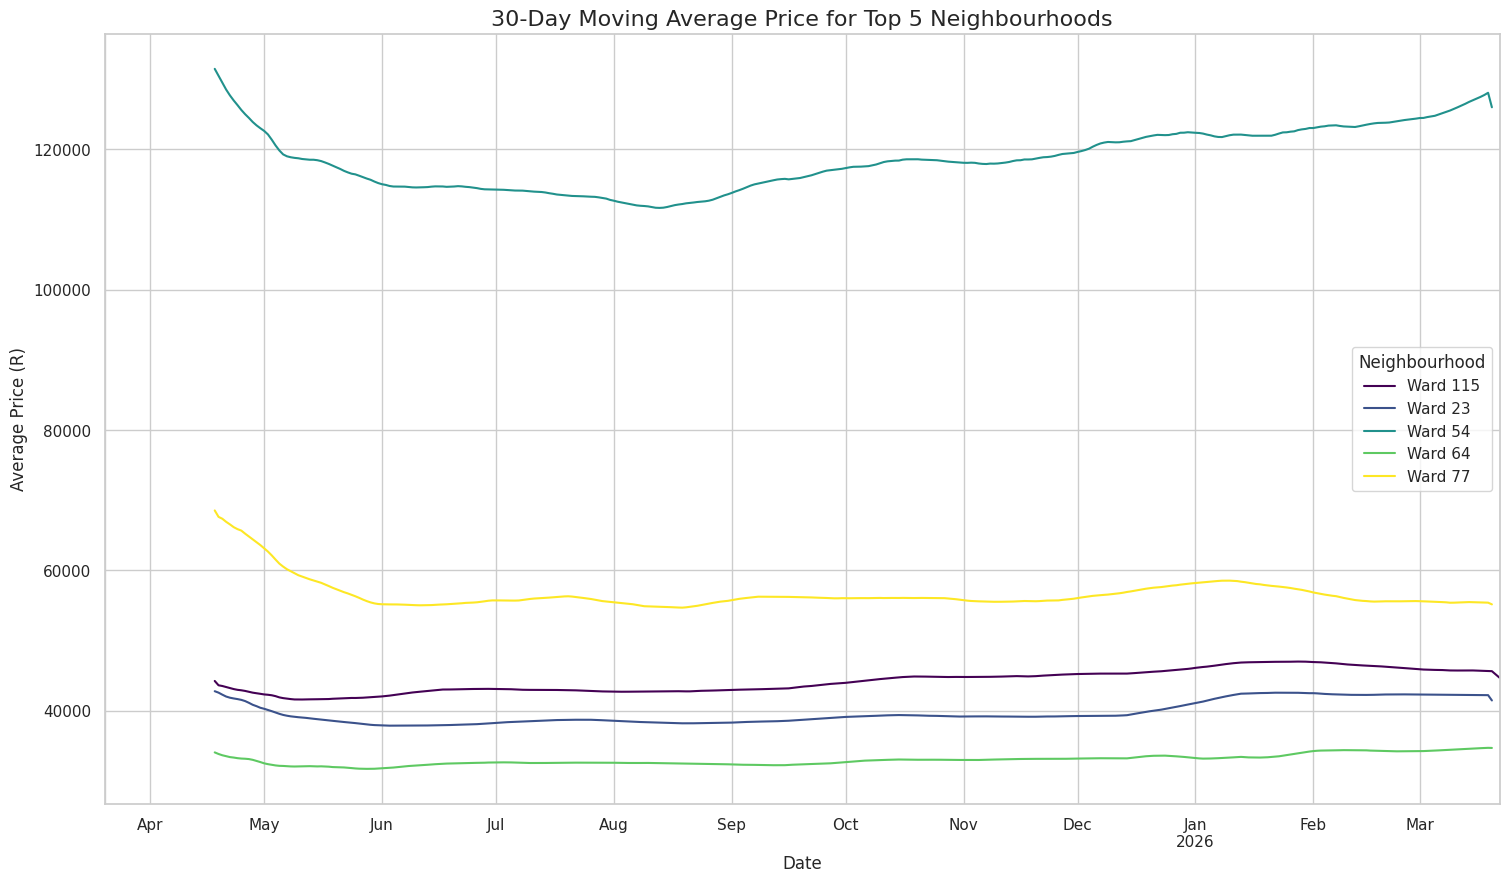

In [ ]:
# --- Temporal Pricing Analysis by Neighbourhood ---

# Finds the top 5 neighborhoods with the most listings available.
top_5_neighbourhoods = merged_df['neighbourhood_cleansed'].value_counts().nlargest(5).index

# Filter the dataframe for these neighborhoods.
df_top_5_hoods = merged_df[merged_df['neighbourhood_cleansed'].isin(top_5_neighbourhoods)]

# Group by date and neighborhood, then find the mean price.
avg_price_by_hood_and_date = df_top_5_hoods.groupby(['date', 'neighbourhood_cleansed'])['price_zar'].mean().unstack()

# Apply a 30-day rolling average for a smoother plot.
smoothed_hood_prices = avg_price_by_hood_and_date.rolling(window=30).mean()

# Plotting the results
smoothed_hood_prices.plot(figsize=(18, 10), colormap='viridis')
plt.title('30-Day Moving Average Price for Top 5 Neighbourhoods', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price (R)', fontsize=12)
plt.legend(title='Neighbourhood')
plt.grid(True)
plt.show()

**Insight** Location is a dominant driver of price, with a staggering difference between neighborhoods. "Ward 54" is an ultra-premium neighborhood, with prices that are more than double the other top areas. "Ward 77" is a distant second, followed by a cluster of more moderately priced neighborhoods (Wards 115, 23, and 64). Importantly, just like with property types, all neighborhoods follow the identical seasonal pattern, indicating that the entire city experiences the same high and low seasons.

#### 3. Impact of Minimum Night Stays on Price

Hosts use minimum_nights as a tool to manage bookings. Does a longer minimum stay requirement correlate with a different daily price? This can help in recommending optimal stay restrictions.

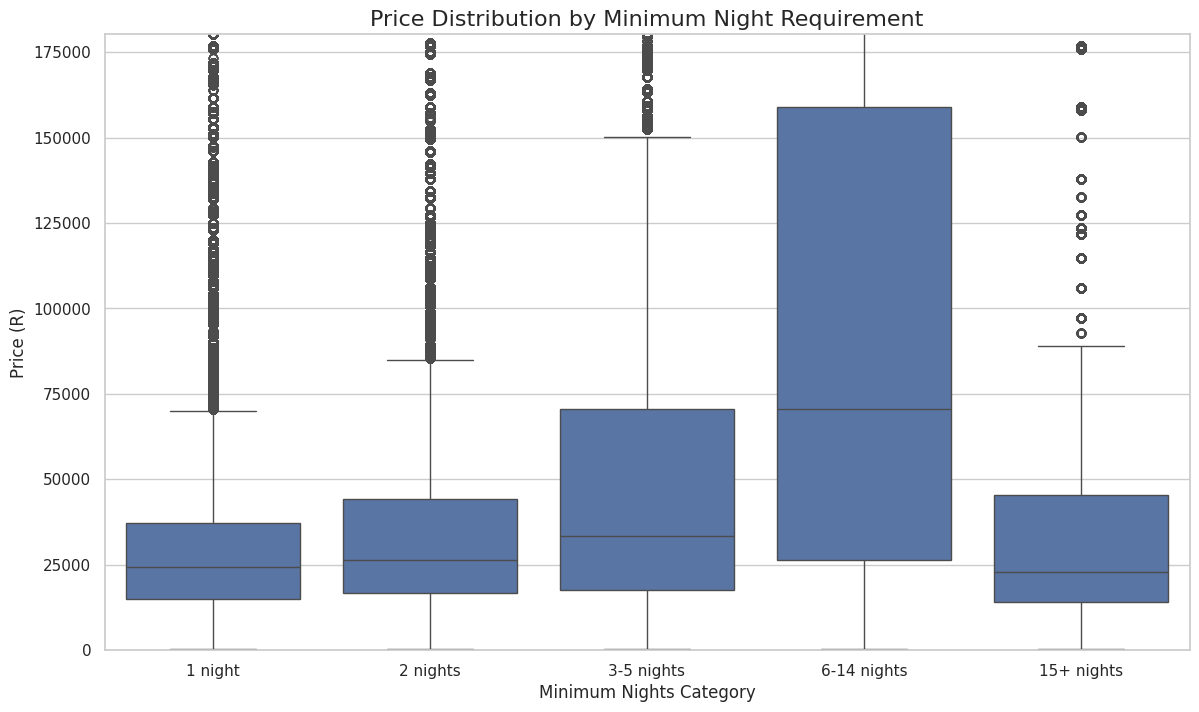

In [ ]:
# --- Analysis of Minimum Nights on Price ---

# The 'minimum_nights' from the calendar file can change daily (e.g., for holidays).
# Let's use the host's default 'minimum_nights' from the listings file for this analysis.

# It's difficult to analyze every single minimum night value (1, 2, 3, 4, etc.).
# A better approach is to bin them into categories.
def categorize_min_nights(nights):
    if nights == 1:
        return '1 night'
    elif nights == 2:
        return '2 nights'
    elif nights >= 3 and nights <= 5:
        return '3-5 nights'
    elif nights >= 6 and nights <= 14:
        return '6-14 nights'
    else:
        return '15+ nights'

# Apply this function to create a new column in our merged dataframe.
# We'll drop rows where minimum_nights is null.
merged_df.dropna(subset=['minimum_nights_y'], inplace=True)
merged_df['min_nights_category'] = merged_df['minimum_nights_y'].apply(categorize_min_nights)

# Define the order for a logical plot
category_order = ['1 night', '2 nights', '3-5 nights', '6-14 nights', '15+ nights']

# Plot the price distribution for each category.
plt.figure(figsize=(14, 8))
sns.boxplot(data=merged_df, x='min_nights_category', y='price_zar', order=category_order)
plt.title('Price Distribution by Minimum Night Requirement', fontsize=16)
plt.xlabel('Minimum Nights Category', fontsize=12)
plt.ylabel('Price (R)', fontsize=12)
# Cap the y-axis to prevent extreme outliers from skewing the view.
plt.ylim(0, merged_df['price_zar'].quantile(0.95))
plt.show()

 **Insight:** The relationship is not straightforward. The median nightly price for "1 night" and "2 nights" stays are the lowest. The price increases for "3-5 nights" and then, unexpectedly, skyrockets for the "6-14 nights" category. This suggests that this category might be dominated by high-end vacation rentals specifically marketed for weekly stays. The price for "15+ nights" drops from that peak but remains higher than for very short stays, which is contrary to the common expectation of a discount for long-term rentals.